In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [ ]:
pwd

'/content'

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 66% 17.0M/25.7M [00:00<00:00, 54.4MB/s]
100% 25.7M/25.7M [00:00<00:00, 58.0MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [ ]:
dataset=pd.read_csv('/content/IMDB Dataset.csv')
dataset.head()
d=dataset['review'].str.len().value_counts()
max(d)

96

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [ ]:

df = pd.read_csv("/content/IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nTotal number of Sentiments: ", len(list(set(df['sentiment']))))

df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)
df

Summary statistics of numerical features : 
                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

Total number of reviews:  50000

Total number of Sentiments:  2


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


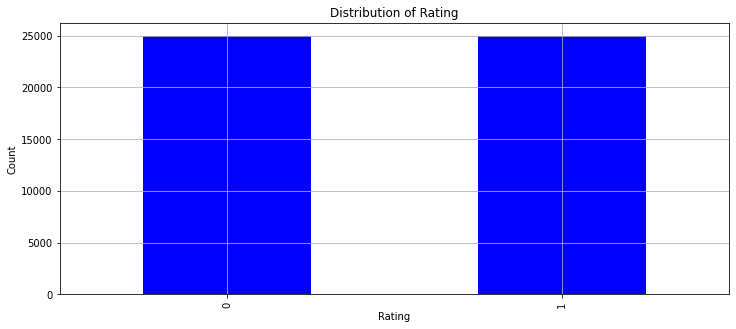

In [ ]:
plt.figure(figsize=(12,5))
# sns.countplot(df['Rating'])
df['sentiment'].value_counts().sort_index().plot(kind='bar',color = 'blue')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("white")

In [ ]:
df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
df.dropna(inplace=True)

df


,review,sentiment
11841,John Cassavetes is on the run from the law. He...,1
19602,It's not just that the movie is lame. It's mor...,0
45519,"Well, if it weren't for Ethel Waters and a 7-y...",0
25747,I find Alan Jacobs review very accurate concer...,1
42642,This movie is simply awesome. It is so hilario...,1
...,...,...
9869,This is an excellent movie that tackles the is...,1
42192,i was kinda interested in this movie as a tras...,0
12143,I think I am some kind of Road Runner fan. I d...,1
34963,Two years passed and mostly everyone looks dif...,1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.2, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 4000 training examples and 1000 validation examples. 

Show a review in the training set : 
 I watched Peter Jackson version of Lord of the Rings when I was half way through reading the Two Towers and I thought it was absolutely brilliant.<br /><br />At this time the animated version of the Lord of the Rings was released on DvD but I told myself that I will finish reading the Two Towers and Return of Kings before watching it (as I thought it showed the whole of the trilogy).<br /><br />So when I did finish the trilogy I went and brought the DvD, which was a stupid idea because it was absolutely rubbish.<br /><br />I was acturly bored 20 minutes in to it which was really strange because I love the book and I am shooked that the maker of this film could of even thought of fitting at least 1 and a half of the books in to a 2 hour 8 minute film.<br /><br />None of the characters had any emotions when they were talking and they seemed to be reading it of a page, even my favourite chara

(25830    The 1970s are often regarded as a golden age o...
 34027    I am giving this movie Vampire Assassins a "2"...
 37378    There's so many things to fall for in Aro Tolb...
 23360    This complicated story begins fairly simply, w...
 49853    A European musician and composer sets out to c...
                                ...                        
 33530    I can not believe such slanted, jingoistic mat...
 16729    This movie was rented by a friend. Her choice ...
 33642    A British teen movies which centres around a g...
 10195    I only gave this film a 4 because I saw it in ...
 7520     What a disappointment!<br /><br />This film se...
 Name: review, Length: 4000, dtype: object, 25830    1
 34027    0
 37378    1
 23360    1
 49853    1
         ..
 33530    0
 16729    0
 33642    0
 10195    0
 7520     0
 Name: sentiment, Length: 4000, dtype: int64)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [ ]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup 
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 i watched peter jackson version of lord of the rings when i was half way through reading the two towers and i thought it was absolutely brilliant at this time the animated version of the lord of the rings was released on dvd but i told myself that i will finish reading the two towers and return of kings before watching it as i thought it showed the whole of the trilogy so when i did finish the trilogy i went and brought the dvd which was a stupid idea because it was absolutely rubbish i was acturly bored minutes in to it which was really strange because i love the book and i am shooked that the maker of this film could of even thought of fitting at least and a half of the books in to a hour minute film none of the characters had any emotions when they were talking and they seemed to be reading it of a page even my favourite character who is gandalf did not seem interesting at all the animation was the only okay in parts of the film except f

In [ ]:
X_train=X_train_cleaned[:7000]
X_test=X_test_cleaned[:7000]
y_train=y_train[:7000]
y_test=y_test[:7000]

In [ ]:
import requests
import re 
import shutil

url1 = 'https://docs.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
resp = requests.get(url1)
code = re.findall('.*confirm=([0-9A-Za-z_]+).*', str(resp.content))
url2 = "https://docs.google.com/uc?export=download&confirm=%s&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM" % code[0]
with requests.get(url2, stream=True, cookies=resp.cookies) as r:
    with open('GoogleNews-vectors-negative300.bin.gz', 'wb') as f:
        shutil.copyfileobj(r.raw, f)

In [ ]:
BASE_DIR = ''
MAX_SEQUENCE_LENGTH = 100
MAX_NUM_WORDS = 30000
EMBEDDING_DIM = 300

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from gensim.models.fasttext import FastText
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D , Dropout
from keras.models import Model

from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [ ]:
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
#sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index.items()

Found 34922 unique tokens.


dict_items([('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('it', 7), ('in', 8), ('i', 9), ('this', 10), ('that', 11), ('s', 12), ('was', 13), ('as', 14), ('for', 15), ('movie', 16), ('with', 17), ('but', 18), ('film', 19), ('you', 20), ('t', 21), ('on', 22), ('he', 23), ('not', 24), ('are', 25), ('his', 26), ('have', 27), ('be', 28), ('one', 29), ('at', 30), ('all', 31), ('by', 32), ('they', 33), ('an', 34), ('who', 35), ('so', 36), ('from', 37), ('like', 38), ('there', 39), ('just', 40), ('her', 41), ('or', 42), ('about', 43), ('out', 44), ('if', 45), ('has', 46), ('what', 47), ('some', 48), ('good', 49), ('when', 50), ('can', 51), ('she', 52), ('more', 53), ('very', 54), ('up', 55), ('time', 56), ('no', 57), ('would', 58), ('my', 59), ('even', 60), ('really', 61), ('which', 62), ('only', 63), ('their', 64), ('story', 65), ('see', 66), ('were', 67), ('had', 68), ('we', 69), ('well', 70), ('me', 71), ('much', 72), ('will', 73), ('than', 74), ('bad', 75), ('do', 76)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1



X_train = pad_sequences(X_train,maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test,maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 100)
(4000,)
(1000, 100)
(1000,)


In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


In [ ]:
f="/content/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
word2vec = KeyedVectors.load_word2vec_format(f, binary=True)
word2vec.wv.get_vector("test")

array([-1.42578125e-01, -3.68652344e-02,  1.35742188e-01, -6.20117188e-02,
        7.95898438e-02,  1.90429688e-02, -8.15429688e-02, -1.27929688e-01,
       -2.95410156e-02,  2.36328125e-01, -1.21582031e-01, -2.14843750e-01,
        1.29882812e-01, -2.70996094e-02, -5.20019531e-02,  2.15820312e-01,
       -1.81640625e-01,  5.10253906e-02, -1.60156250e-01, -1.76757812e-01,
        1.83105469e-02, -4.12597656e-02, -2.32421875e-01, -1.03149414e-02,
        1.45507812e-01,  5.24902344e-02, -3.96484375e-01, -1.92871094e-02,
        2.51770020e-03, -1.26953125e-02, -4.39453125e-02,  3.07617188e-02,
        9.57031250e-02, -1.75781250e-01,  1.04370117e-02,  1.89453125e-01,
       -2.36328125e-01,  4.37011719e-02,  2.81250000e-01, -2.07519531e-02,
       -1.81640625e-01, -2.17773438e-01,  2.33398438e-01,  5.29785156e-02,
       -1.13769531e-01,  9.39941406e-03, -1.49414062e-01,  1.99218750e-01,
       -1.75781250e-01,  3.16406250e-01,  8.10546875e-02, -6.12792969e-02,
       -1.52343750e-01, -

In [ ]:
print('Preparing embedding matrix.')
EMBEDDING_DIM=300
words_not_found = []
num_words = min(MAX_NUM_WORDS,vocab_size)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():

    if i >= MAX_NUM_WORDS:
        continue
    try:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

    #embedding_vector = word2vec.wv.get_vector(word)
    


Preparing embedding matrix.


In [ ]:
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
model = Sequential()
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(3)(x)
x=LSTM(100, dropout=0.1, recurrent_dropout=0.2)(x)
preds=Dense(1, activation='sigmoid')(x)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          9000000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           192128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                             

In [ ]:
history_3 =model.fit(X_train, y_train,
          batch_size=256,
          shuffle=True,
          epochs=21,
          validation_data=(X_test,y_test))

Epoch 1/21
16/16 [==============================] - 21s 465ms/step - loss: 0.6797 - accuracy: 0.5602 - val_loss: 0.6651 - val_accuracy: 0.5760
Epoch 2/21
16/16 [==============================] - 6s 392ms/step - loss: 0.6066 - accuracy: 0.6705 - val_loss: 0.5960 - val_accuracy: 0.6770
Epoch 3/21
16/16 [==============================] - 7s 411ms/step - loss: 0.4636 - accuracy: 0.7875 - val_loss: 0.5083 - val_accuracy: 0.7540
Epoch 4/21
16/16 [==============================] - 6s 395ms/step - loss: 0.4045 - accuracy: 0.8145 - val_loss: 0.4656 - val_accuracy: 0.7800
Epoch 5/21
16/16 [==============================] - 6s 387ms/step - loss: 0.3605 - accuracy: 0.8365 - val_loss: 0.4423 - val_accuracy: 0.7990
Epoch 6/21
16/16 [==============================] - 6s 391ms/step - loss: 0.3669 - accuracy: 0.8320 - val_loss: 0.5226 - val_accuracy: 0.7610
Epoch 7/21
16/16 [==============================] - 7s 403ms/step - loss: 0.3107 - accuracy: 0.8655 - val_loss: 0.4581 - val_accuracy: 0.8080
Epoch

In [ ]:
scores = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

32/32 [==============================] - 1s 22ms/step - loss: 0.7031 - accuracy: 0.8130

accuracy: 81.30%


In [ ]:
loss, accuracy = model.evaluate(X_test,y_test,verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Testing Accuracy:  0.8130
Testing Loss:  0.7031


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[9.99931574e-01],
       [3.33960876e-02],
       [9.99045551e-01],
       [2.96928495e-01],
       [9.99939919e-01],
       [1.69279158e-01],
       [9.99733746e-01],
       [9.64946486e-03],
       [4.61976491e-02],
       [1.64286103e-02],
       [9.95484233e-01],
       [8.72319797e-05],
       [9.99044716e-01],
       [5.33331222e-05],
       [9.41038251e-01],
       [9.90112126e-01],
       [9.99132693e-01],
       [3.16230347e-04],
       [9.99632597e-01],
       [8.42817500e-03],
       [9.99903202e-01],
       [2.24400312e-04],
       [2.98463225e-01],
       [6.23266169e-05],
       [7.16280639e-02],
       [8.99051011e-01],
       [1.87160666e-04],
       [9.99548137e-01],
       [1.28155472e-04],
       [2.61956342e-02],
       [9.99744952e-01],
       [1.61523826e-03],
       [5.10200560e-01],
       [1.74385306e-04],
       [9.59236205e-01],
       [6.07837646e-05],
       [1.19712677e-04],
       [1.45300090e-01],
       [9.83860016e-01],
       [4.42793185e-04],


In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

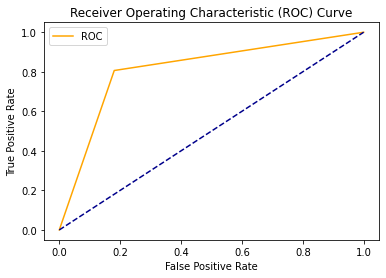

 0.81


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plot_roc_curve(fpr, tpr)
auc = roc_auc_score(y_test,y_pred)
print(' %.2f' % auc)

In [ ]:
conf_mat=  confusion_matrix(y_test,y_pred)
conf_mat

array([[413,  91],
       [ 96, 400]])

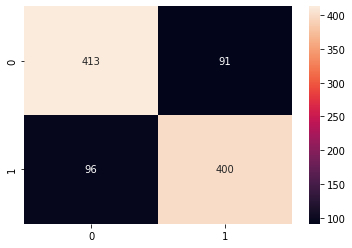

In [ ]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       504
           1       0.81      0.81      0.81       496

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [ ]:
#implementation through Glove+CNN-LSTM

In [ ]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7f8422a42310>)

In [ ]:
!unzip "/content/glove.6B.zip" -d "/content/"

Archive:  /content/glove.6B.zip
replace /content/glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/glove.6B.50d.txt  
replace /content/glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/glove.6B.300d.txt  y
y



In [ ]:
emmbed_dict = {}
with open('/content/glove.6B.300d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector

In [ ]:
len(emmbed_dict['river'])

300

In [ ]:

def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map

In [ ]:
word_to_vec_map = read_glove_vector('/content/glove.6B.300d.txt')

maxLen = 100

In [ ]:
embed_vector_len = word_to_vec_map['moon'].shape[0]
embed_vector_len

300

In [ ]:
vocab_len = len(word_index)
vocab_len

34922

In [ ]:
embeddings_index = dict()
f = open('/content/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
model = Sequential()
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(3)(x)
x=LSTM(100, dropout=0.1, recurrent_dropout=0.2)(x)
preds=Dense(1, activation='sigmoid')(x)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          9000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           192128    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 128)          0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 100)               91600     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                           

In [ ]:
history_4 =model.fit(X_train, y_train,
          batch_size=256,
          shuffle=True,
          epochs=5,
          validation_data=(X_test,y_test))

Epoch 1/5
16/16 [==============================] - 7s 422ms/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.8962 - val_accuracy: 0.7980
Epoch 2/5
16/16 [==============================] - 6s 382ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.9103 - val_accuracy: 0.7950
Epoch 3/5
16/16 [==============================] - 7s 412ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.9030 - val_accuracy: 0.8100
Epoch 4/5
16/16 [==============================] - 7s 433ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.9962 - val_accuracy: 0.7900
Epoch 5/5
16/16 [==============================] - 6s 399ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8870 - val_accuracy: 0.8070


In [ ]:
scores = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

32/32 [==============================] - 1s 22ms/step - loss: 0.8870 - accuracy: 0.8070

accuracy: 80.70%


In [ ]:
loss, accuracy = model.evaluate(X_test,y_test,verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Testing Accuracy:  0.8070
Testing Loss:  0.8870


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[9.99961138e-01],
       [7.62860384e-03],
       [9.98521388e-01],
       [4.35786322e-03],
       [9.99964595e-01],
       [9.34023321e-01],
       [9.97268438e-01],
       [1.39564918e-02],
       [9.21304896e-02],
       [5.77878309e-05],
       [9.99306560e-01],
       [8.50240831e-05],
       [9.98740375e-01],
       [8.98931557e-06],
       [6.83155775e-01],
       [9.98664975e-01],
       [9.99968410e-01],
       [2.74711947e-05],
       [9.99858737e-01],
       [3.53259414e-01],
       [9.99936461e-01],
       [7.71018313e-05],
       [9.80050027e-01],
       [3.34514225e-05],
       [7.82425981e-04],
       [9.97684360e-01],
       [8.88934737e-05],
       [9.99560535e-01],
       [2.38301054e-05],
       [1.16656706e-01],
       [9.99954581e-01],
       [2.64669245e-04],
       [1.01174966e-01],
       [4.02021215e-05],
       [3.23702335e-01],
       [2.05080214e-05],
       [2.48143642e-05],
       [6.55320734e-02],
       [9.86533284e-01],
       [8.26592222e-05],


In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],

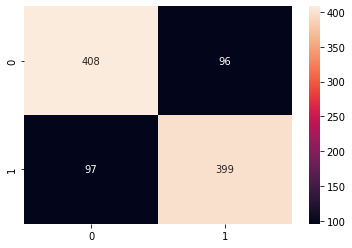

In [ ]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')

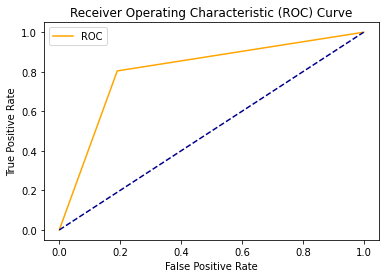

 0.81


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plot_roc_curve(fpr, tpr)
auc = roc_auc_score(y_test,y_pred)
print(' %.2f' % auc)